# Temporal Distribution of Population from Southern Asia and Eastern Asia by gender

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
dataPath_region = '../data/merged_data/merged_birthPlaceRegion_sex.csv'
data_region = pd.read_csv(dataPath_region)
# Filter only Southern Asia
data_southern_asia = data_region[data_region['Birth_Place_Region'] == 'Southern Asia']

immigration_summary_southern = data_southern_asia.groupby(['Year_Reference', 'Sex'], as_index=False)['Value'].sum().rename(columns={'Value':'total_immigration'})
#Filter only Eastern Asia
data_east_asia = data_region[data_region['Birth_Place_Region'] == 'Eastern Asia']

immigration_summary_eastern = data_east_asia.groupby(['Year_Reference', 'Sex'], as_index=False)['Value'].sum().rename(columns={'Value':'total_immigration'})

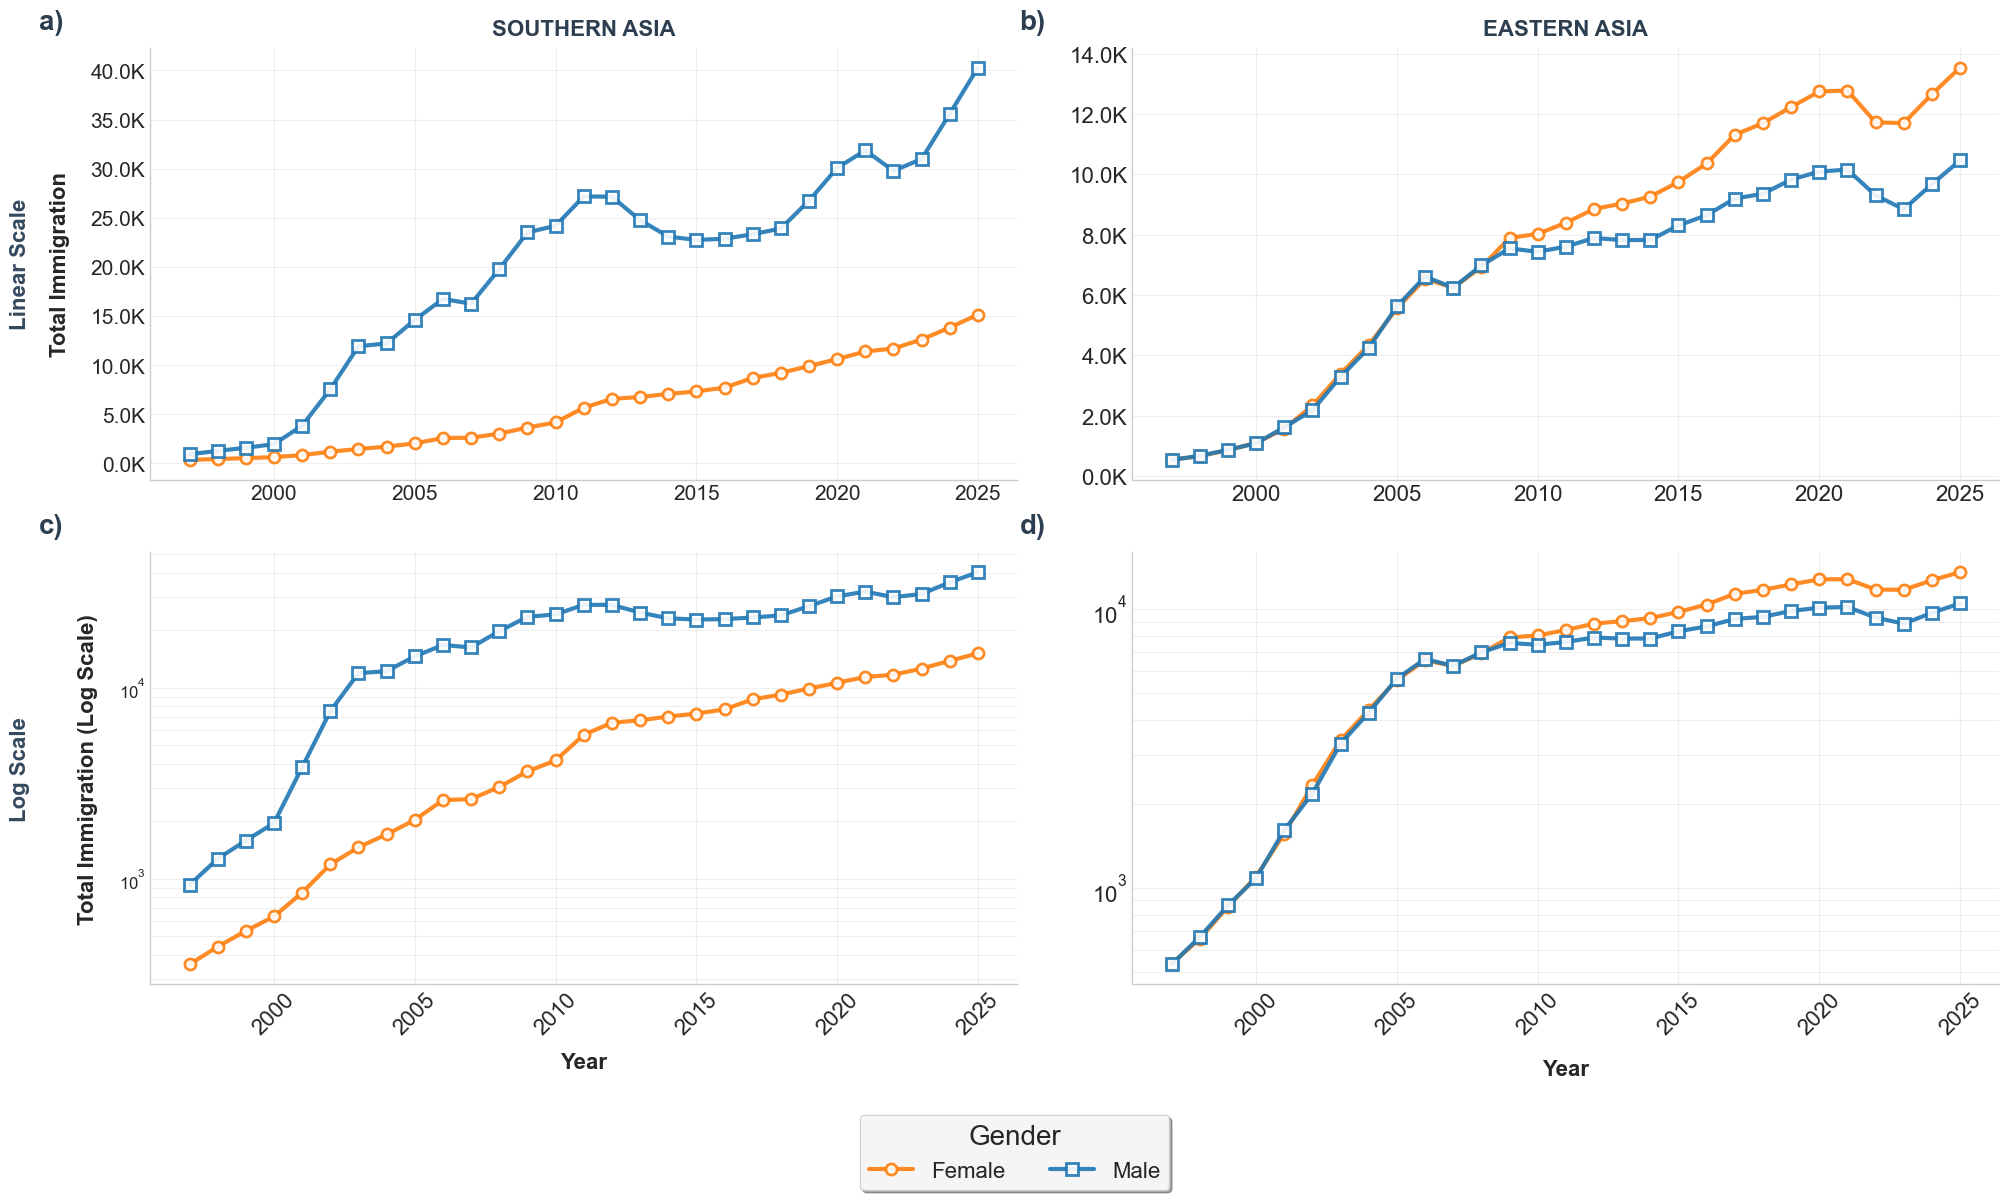

In [ ]:

# Set up professional colorblind-friendly palette
COLORS = ["#ff7f0e", "#1f77b4"]  # Orange for Male, Blue for Female

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(COLORS)

# Create 2x2 grid subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.patch.set_facecolor('white')

# Flatten axes for easier indexing
ax1, ax2, ax3, ax4 = axes.flatten()

# Get unique sexes for consistent plotting
sexes = immigration_summary_southern['Sex'].unique()

# TOP LEFT: Southern Asia - Linear Scale
for i, sex in enumerate(sexes):
    subset = immigration_summary_southern[immigration_summary_southern['Sex'] == sex]
    ax1.plot(subset['Year_Reference'], subset['total_immigration'], 
             marker=['o', 's'][i], linestyle='-', linewidth=3, markersize=8,
             label=sex, alpha=0.9, markerfacecolor='white', markeredgewidth=2,
             markeredgecolor=COLORS[i], color=COLORS[i])

ax1.set_ylabel('Total Immigration', fontsize=16, fontweight='semibold', labelpad=15)
ax1.grid(True, alpha=0.3)
ax1.set_axisbelow(True)
ax1.tick_params(axis='both', which='major', labelsize=15)
# show y-axis in thousands (e.g. 2.3K) instead of raw integers
ax1.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x/1e3:.1f}K")
)


# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)

# BOTTOM LEFT: Southern Asia - Log Scale
for i, sex in enumerate(sexes):
    subset = immigration_summary_southern[immigration_summary_southern['Sex'] == sex]
    ax3.plot(subset['Year_Reference'], subset['total_immigration'], 
             marker=['o', 's'][i], linestyle='-', linewidth=3, markersize=8,
             label=sex, alpha=0.9, markerfacecolor='white', markeredgewidth=2,
             markeredgecolor=COLORS[i], color=COLORS[i])

ax3.set_xlabel('Year', fontsize=16, fontweight='semibold', labelpad=10)
ax3.set_ylabel('Total Immigration (Log Scale)', fontsize=16, fontweight='semibold', labelpad=15)
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')
ax3.set_axisbelow(True)
ax3.tick_params(axis='both', which='major', labelsize=12)

for spine in ['top', 'right']:
    ax3.spines[spine].set_visible(False)

# TOP RIGHT: Eastern Asia - Linear Scale
for i, sex in enumerate(sexes):
    subset = immigration_summary_eastern[immigration_summary_eastern['Sex'] == sex]
    ax2.plot(subset['Year_Reference'], subset['total_immigration'], 
             marker=['o', 's'][i], linestyle='-', linewidth=3, markersize=8,
             label=sex, alpha=0.9, markerfacecolor='white', markeredgewidth=2,
             markeredgecolor=COLORS[i], color=COLORS[i])

ax2.grid(True, alpha=0.3)
ax2.set_axisbelow(True)
ax2.tick_params(axis='both', which='major', labelsize=16)
# show y-axis in thousands (e.g. 2.3K) instead of raw integers
ax2.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x/1e3:.1f}K")
)

for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)

# BOTTOM RIGHT: Eastern Asia - Log Scale
for i, sex in enumerate(sexes):
    subset = immigration_summary_eastern[immigration_summary_eastern['Sex'] == sex]
    ax4.plot(subset['Year_Reference'], subset['total_immigration'], 
             marker=['o', 's'][i], linestyle='-', linewidth=3, markersize=8,
             label=sex, alpha=0.9, markerfacecolor='white', markeredgewidth=2,
             markeredgecolor=COLORS[i], color=COLORS[i])

ax4.set_xlabel('Year', fontsize=16, fontweight='semibold', labelpad=15)
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3, which='both')
ax4.set_axisbelow(True)
ax4.tick_params(axis='both', which='major', labelsize=16)

for spine in ['top', 'right']:
    ax4.spines[spine].set_visible(False)

# Add region labels on top of the top figures
ax1.text(0.5, 1.02, 'SOUTHERN ASIA', transform=ax1.transAxes, 
         fontsize=16, fontweight='bold', ha='center', va='bottom', color='#2C3E50')
ax2.text(0.5, 1.02, 'EASTERN ASIA', transform=ax2.transAxes, 
         fontsize=16, fontweight='bold', ha='center', va='bottom', color='#2C3E50')

# Add scale labels on the left side
ax1.text(-0.15, 0.5, 'Linear Scale', transform=ax1.transAxes, 
         fontsize=16, fontweight='semibold', ha='center', va='center', 
         rotation=90, color='#34495E')
ax3.text(-0.15, 0.5, 'Log Scale', transform=ax3.transAxes, 
         fontsize=16, fontweight='semibold', ha='center', va='center', 
         rotation=90, color='#34495E')

# Create a single legend for the entire figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 0.02),  # Position below the plots
           ncol=2,  # Display in two columns
           fontsize=16, 
           frameon=True, 
           fancybox=True, 
           shadow=True, 
           framealpha=0.9,
           title='Gender',
           title_fontsize=20)

# Flatten axes for easier indexing
ax1, ax2, ax3, ax4 = axes.flatten()

# Add labels to each panel
panel_labels = ['a)', 'b)', 'c)', 'd)']
for ax, lbl in zip([ax1, ax2, ax3, ax4], panel_labels):
    # Place the label slightly outside/above the left corner.
    # Change x to 0.02 and y to 0.95 if you prefer inside the axis.
    ax.text(
        -0.10, 1.03, lbl,
        transform=ax.transAxes,
        fontsize=20,
        fontweight='bold',
        ha='right',
        va='bottom',
        color='#2C3E50'
    )


plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right margin to make space for legend

# Rotate x-ticks for all bottom plots
for ax in [ax3, ax4]:
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=16)



plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)  # Adjust bottom to make space for legend

# Save figure
plt.savefig('../data/outputs/good/asia_immigration_comparison_combined.png', 
            dpi=300, bbox_inches='tight', facecolor='white', 
            transparent=False, edgecolor='none')
plt.show()